In [18]:
import pandas as pd

df_dl_mobile = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results_diss/energy_csvs/dram_accesses_deeplabv3_mobilenet.csv')
df_dl_resnet101 = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results_diss/energy_csvs/dram_accesses_deeplabv3_resnet101.csv')
df_unet = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results_diss/energy_csvs/dram_accesses_unet.csv')
df_yolop = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results_diss/energy_csvs/dram_accesses_yolop.csv')

df = df_unet


df.head()

,Unnamed: 0,layer_idx,layer_type,w_reads,i_reads,o_reads,w_updates,i_updates,o_updates,w_fills,i_fills,o_fills,w_energy,i_energy,o_energy,total_dram_energy,bitwidth
0,0,0,QuantConv2d,9408,1480395,0,0,0,7782400,0,0,0,200.0,200.0,200.0,1.854441e+09,16
1,1,1,QuantConv2d,294912,2171904,0,0,0,1945600,0,0,0,200.0,200.0,200.0,8.824832e+08,16
2,2,2,QuantConv2d,294912,2171904,0,0,0,1945600,0,0,0,200.0,200.0,200.0,8.824832e+08,16
3,3,3,QuantConv2d,294912,2171904,0,0,0,1945600,0,0,0,200.0,200.0,200.0,8.824832e+08,16
4,4,4,QuantConv2d,294912,2171904,0,0,0,1945600,0,0,0,200.0,200.0,200.0,8.824832e+08,16


## Sum up the total accesses for weights, inputs and outputs

In [19]:
accesses_w = df['w_updates'].sum() + df['w_reads'].sum() + df['w_fills'].sum()
accesses_i = df['i_updates'].sum() + df['i_reads'].sum() + df['i_fills'].sum()
accesses_o = df['o_updates'].sum() + df['o_reads'].sum() + df['o_fills'].sum()

In [20]:
accesses = accesses_i + accesses_o + accesses_w
print(f"Total accesses to DRAM: {accesses:,}")

Total accesses to DRAM: 257,007,451


In [21]:
energy = 0.0
for i, row in df.iterrows():
    energy += (row['w_updates'] + row['w_reads'] + row['w_fills']) * row['w_energy']
    energy += (row['i_updates'] + row['i_reads'] + row['i_fills']) * row['i_energy']
    energy += (row['o_updates'] + row['o_reads'] + row['o_fills']) * row['o_energy']
    
energy = energy / 1_000_000_000
print(f"Energy: {energy:,.2f}mJ")

Energy: 51.40mJ


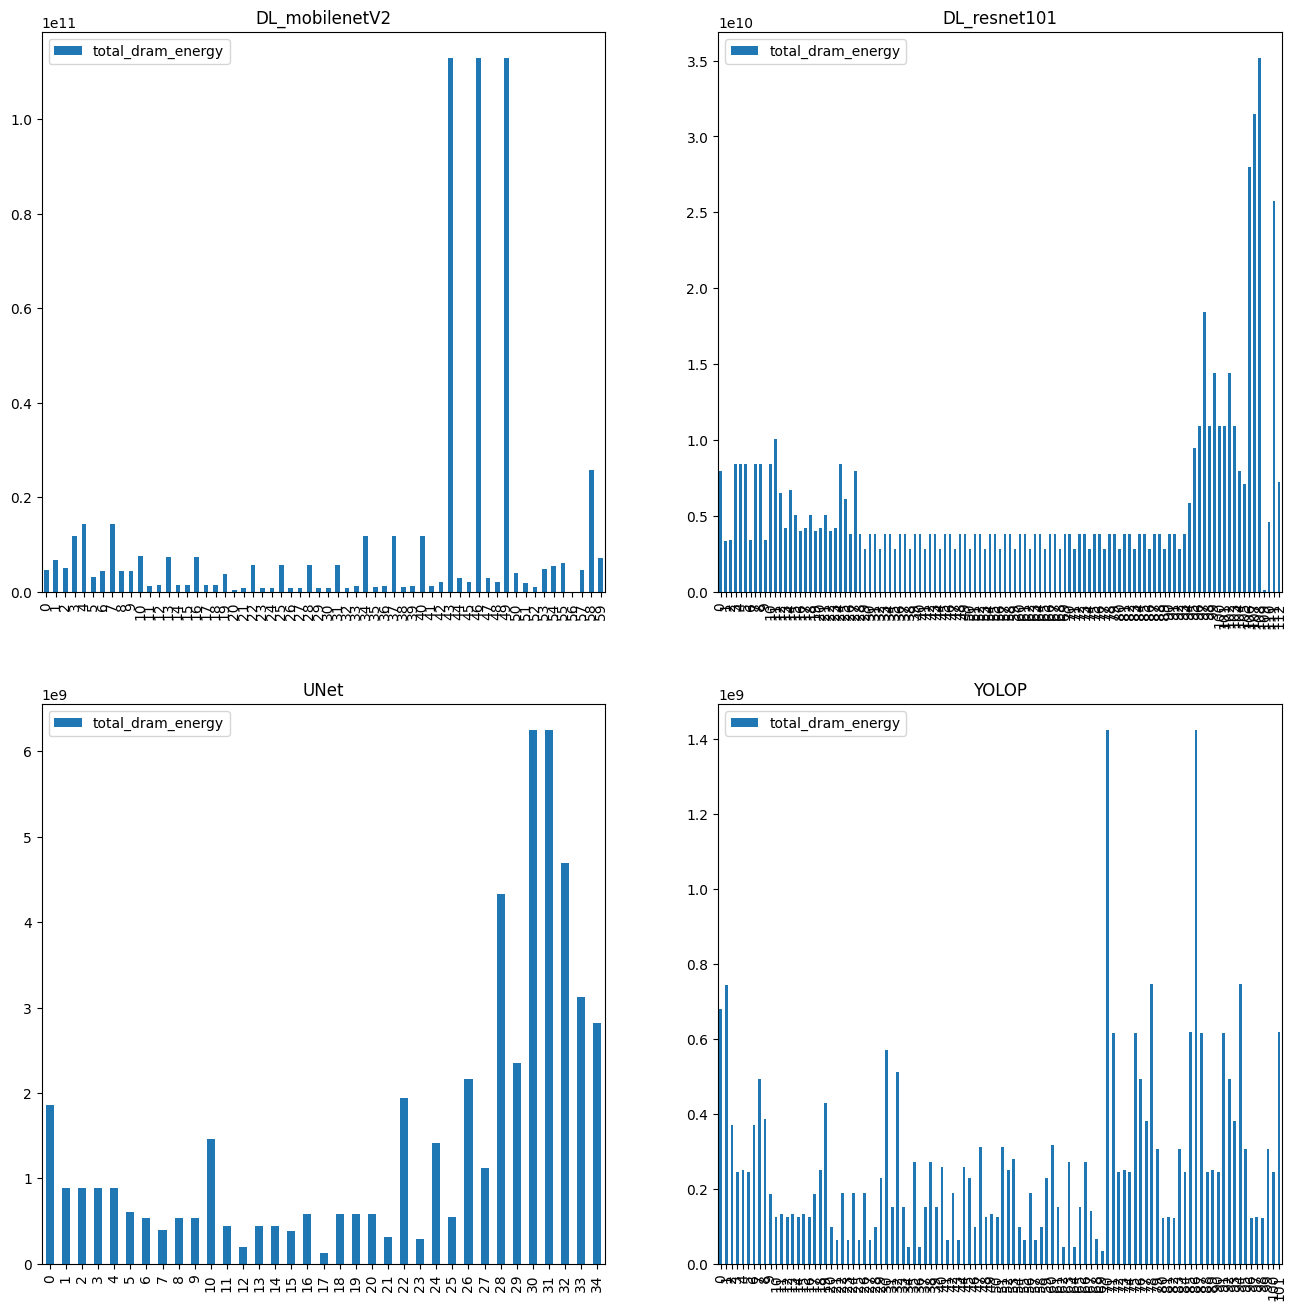

In [22]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,16))
axes = ax.flatten()
datas = {}

for ax, df, fn in zip(axes, [df_dl_mobile, df_dl_resnet101, df_unet, df_yolop], ['DL_mobilenetV2', 'DL_resnet101', 'UNet', 'YOLOP']):
    # ax.set_xlim(left=0.6, right=0.82)
    df.plot(kind='bar', y='total_dram_energy', use_index=True, ax=ax)
    ax.set_title(fn)
